In [1]:
from __future__ import absolute_import,division,print_function
import codecs#encoding,word embedding
import glob#find all filenames matching a pattern
import logging#log events for libraries
import multiprocessing#concurrency
import os#dealing with operating system like reading file
import pprint#pretty print, human readable
import re#regular expression
import nltk#natural language toolkit
import gensim.models.word2vec as w2v#word2vec
import sklearn.manifold#dimensionality reduction
import numpy as np#math
import matplotlib.pyplot#plotting
import pandas as pd#parse dataset
import seaborn as sns#visualization
from sklearn.decomposition import PCA
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

C:\Users\aayushi srivastava\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [4]:
#process our data
#clean data
#stopwords like the at a an, unnecesasry
#tokenization into sentences, punkt 
#http://www.nltk.org/
nltk.download("punkt")#pretrained tokenizer
nltk.download("stopwords")#words like,and,the,an,of,a

[nltk_data] Downloading package punkt to C:\Users\aayushi
[nltk_data]     srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\aayushi
[nltk_data]     srivastava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#get the paper names,matching text files
book_filenames = sorted(glob.glob("C:\*.txt"))

In [6]:
     #print papers
print("Found papers:")
book_filenames

Found papers:


['C:\\icse_id.txt', 'C:\\vldb_id.txt']

In [7]:
#step 1 process data
#initialize rawunicode , we'll add all text to a big file in memory
corpus_raw = u""
#for each book, read it, open it un utf 8 format, 
#add it to the raw corpus
for book_filename in book_filenames:
    print("Reading '{0}'...".format(book_filename))
    with codecs.open(book_filename, "r", "utf-8") as book_file:
        corpus_raw += book_file.read()
    print("Corpus is now {0} characters long".format(len(corpus_raw)))
    print()

Reading 'C:\icse_id.txt'...
Corpus is now 2534815 characters long

Reading 'C:\vldb_id.txt'...
Corpus is now 3421158 characters long



In [8]:
#tokenizastion! saved the trained model here
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [9]:
#tokenize into sentences
raw_sentences = tokenizer.tokenize(corpus_raw)

In [10]:
#convert into list of words
#remove unecessary characters, split into words, no hyhens and shit
#split into words
def sentence_to_wordlist(raw):
    clean = re.sub("[^a-zA-Z]"," ", raw)
    words = clean.split()
    return words

In [11]:
#for each sentece, sentences where each word is tokenized
sentences = []
for raw_sentence in raw_sentences:
    if len(raw_sentence) > 0:
        sentences.append(sentence_to_wordlist(raw_sentence))

In [12]:
#print an example
print(raw_sentences[3])
print(sentence_to_wordlist(raw_sentences[5]))

why use the model driven architecture to design and build distributed applications	2005	2005/05/15	10.1109/ICSE.2005.1553538	international conference on software engineering	icse		45FFFB88	17076
0A7D0D1F	Formal Methods in Energy Informatics	formal methods in energy informatics	2011	2011/11/14	10.1007/978-3-642-24690-6_1	international conference on software engineering	icse		45FFFB88	18687
483FD845	A Study on the Specification for e-Business Agent Oriented Component Based Development	a study on the specification for e business agent oriented component based development	2003	2003/06/25	10.1007/978-3-540-24675-6_12	international conference on software engineering	icse		45FFFB88	19483
7D616DBF	The application of digital signal processing (DSP) for the real time solving of artillery fire control exterior trajectory	the application of digital signal processing dsp for the real time solving of artillery fire control exterior trajectory	2012	2012/06	10.1109/ICSESS.2012.6269399	international co

In [13]:
#count tokens, each one being a sentence
token_count = sum([len(sentence) for sentence in sentences])
print("The book corpus contains {0:,} tokens".format(token_count))

The book corpus contains 400,225 tokens


In [14]:
#ONCE we have vectors
#step 3 - build model
#3 main tasks that vectors help with
#DISTANCE, SIMILARITY, RANKING

# Dimensionality of the resulting word vectors.
#more dimensions, more computationally expensive to train
#but also more accurate
#more dimensions = more generalized
num_features = 300
# Minimum word count threshold.
min_word_count = 3

# Number of threads to run in parallel.
#more workers, faster we train
num_workers = multiprocessing.cpu_count()

# Context window length.
context_size = 7

# Downsample setting for frequent words.
#0 - 1e-5 is good for this
downsampling = 1e-3

# Seed for the RNG, to make the results reproducible.
#random number generator
#deterministic, good for debugging
seed = 1

In [15]:
thrones2vec = w2v.Word2Vec(
    sg=1,
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling
)

In [16]:
#train model on sentences
thrones2vec.build_vocab(sentences)

2018-11-25 16:24:59,227 : INFO : collecting all words and their counts
2018-11-25 16:24:59,230 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-11-25 16:24:59,332 : INFO : collected 19952 word types from a corpus of 400225 raw words and 266 sentences
2018-11-25 16:24:59,335 : INFO : Loading a fresh vocabulary
2018-11-25 16:24:59,456 : INFO : effective_min_count=3 retains 7467 unique words (37% of original 19952, drops 12485)
2018-11-25 16:24:59,459 : INFO : effective_min_count=3 leaves 383740 word corpus (95% of original 400225, drops 16485)
2018-11-25 16:24:59,487 : INFO : deleting the raw counts dictionary of 19952 items
2018-11-25 16:24:59,490 : INFO : sample=0.001 downsamples 37 most-common words
2018-11-25 16:24:59,499 : INFO : downsampling leaves estimated 245546 word corpus (64.0% of prior 383740)
2018-11-25 16:24:59,538 : INFO : estimated required memory for 7467 words and 300 dimensions: 21654300 bytes
2018-11-25 16:24:59,540 : INFO : resetting l

In [17]:
print("Word2Vec vocabulary length:", len(thrones2vec.wv.vocab))

Word2Vec vocabulary length: 7467


In [18]:
thrones2vec.train(sentences, total_examples=thrones2vec.corpus_count , epochs=100)

2018-11-25 16:25:12,259 : INFO : training model with 4 workers on 7467 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=7
2018-11-25 16:25:13,272 : INFO : EPOCH 1 - PROGRESS: at 64.29% examples, 149042 words/s, in_qsize 7, out_qsize 0
2018-11-25 16:25:13,750 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-25 16:25:13,793 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-25 16:25:13,796 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-25 16:25:13,854 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-25 16:25:13,858 : INFO : EPOCH - 1 : training on 400225 raw words (245312 effective words) took 1.6s, 153968 effective words/s
2018-11-25 16:25:14,869 : INFO : EPOCH 2 - PROGRESS: at 71.05% examples, 169224 words/s, in_qsize 8, out_qsize 0
2018-11-25 16:25:15,221 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-25 16:25:15,253 : INFO : wo

2018-11-25 16:25:32,898 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-25 16:25:32,913 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-25 16:25:32,928 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-25 16:25:32,976 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-25 16:25:32,979 : INFO : EPOCH - 14 : training on 400225 raw words (245747 effective words) took 1.5s, 166097 effective words/s
2018-11-25 16:25:34,048 : INFO : EPOCH 15 - PROGRESS: at 72.93% examples, 164957 words/s, in_qsize 7, out_qsize 0
2018-11-25 16:25:34,335 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-25 16:25:34,355 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-25 16:25:34,375 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-25 16:25:34,418 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-25 16:25:34,42

2018-11-25 16:25:51,490 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-25 16:25:51,493 : INFO : EPOCH - 27 : training on 400225 raw words (245440 effective words) took 1.4s, 174919 effective words/s
2018-11-25 16:25:52,546 : INFO : EPOCH 28 - PROGRESS: at 72.56% examples, 167893 words/s, in_qsize 7, out_qsize 0
2018-11-25 16:25:52,825 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-25 16:25:52,858 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-25 16:25:52,881 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-25 16:25:52,910 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-25 16:25:52,914 : INFO : EPOCH - 28 : training on 400225 raw words (245738 effective words) took 1.4s, 173559 effective words/s
2018-11-25 16:25:53,948 : INFO : EPOCH 29 - PROGRESS: at 72.56% examples, 170271 words/s, in_qsize 8, out_qsize 0
2018-11-25 16:25:54,244 : INFO : worker threa

2018-11-25 16:26:11,197 : INFO : EPOCH 41 - PROGRESS: at 72.56% examples, 169552 words/s, in_qsize 8, out_qsize 0
2018-11-25 16:26:11,480 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-25 16:26:11,499 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-25 16:26:11,546 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-25 16:26:11,578 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-25 16:26:11,582 : INFO : EPOCH - 41 : training on 400225 raw words (245499 effective words) took 1.4s, 172912 effective words/s
2018-11-25 16:26:12,634 : INFO : EPOCH 42 - PROGRESS: at 72.93% examples, 167438 words/s, in_qsize 7, out_qsize 0
2018-11-25 16:26:12,918 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-25 16:26:12,947 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-25 16:26:12,976 : INFO : worker thread finished; awaiting finish of 1 more threads

2018-11-25 16:26:31,039 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-25 16:26:31,073 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-25 16:26:31,076 : INFO : EPOCH - 54 : training on 400225 raw words (245744 effective words) took 1.4s, 169885 effective words/s
2018-11-25 16:26:32,154 : INFO : EPOCH 55 - PROGRESS: at 72.56% examples, 163618 words/s, in_qsize 7, out_qsize 0
2018-11-25 16:26:32,430 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-25 16:26:32,463 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-25 16:26:32,476 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-25 16:26:32,519 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-25 16:26:32,522 : INFO : EPOCH - 55 : training on 400225 raw words (245480 effective words) took 1.4s, 170479 effective words/s
2018-11-25 16:26:33,585 : INFO : EPOCH 56 - PROGRESS: at 72.56% exam

2018-11-25 16:26:50,831 : INFO : EPOCH 68 - PROGRESS: at 66.54% examples, 153234 words/s, in_qsize 8, out_qsize 1
2018-11-25 16:26:51,256 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-25 16:26:51,267 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-25 16:26:51,305 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-25 16:26:51,332 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-25 16:26:51,335 : INFO : EPOCH - 68 : training on 400225 raw words (245843 effective words) took 1.5s, 161537 effective words/s
2018-11-25 16:26:52,391 : INFO : EPOCH 69 - PROGRESS: at 72.93% examples, 167255 words/s, in_qsize 7, out_qsize 0
2018-11-25 16:26:52,684 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-25 16:26:52,697 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-25 16:26:52,730 : INFO : worker thread finished; awaiting finish of 1 more threads

2018-11-25 16:27:10,105 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-25 16:27:10,154 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-25 16:27:10,157 : INFO : EPOCH - 81 : training on 400225 raw words (245648 effective words) took 1.4s, 171723 effective words/s
2018-11-25 16:27:11,224 : INFO : EPOCH 82 - PROGRESS: at 72.56% examples, 165552 words/s, in_qsize 7, out_qsize 0
2018-11-25 16:27:11,515 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-25 16:27:11,529 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-25 16:27:11,546 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-25 16:27:11,598 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-25 16:27:11,601 : INFO : EPOCH - 82 : training on 400225 raw words (245648 effective words) took 1.4s, 170602 effective words/s
2018-11-25 16:27:12,648 : INFO : EPOCH 83 - PROGRESS: at 72.93% exam

2018-11-25 16:27:29,811 : INFO : EPOCH 95 - PROGRESS: at 72.56% examples, 169556 words/s, in_qsize 7, out_qsize 0
2018-11-25 16:27:30,115 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-25 16:27:30,140 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-25 16:27:30,170 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-11-25 16:27:30,198 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-11-25 16:27:30,201 : INFO : EPOCH - 95 : training on 400225 raw words (245557 effective words) took 1.4s, 172009 effective words/s
2018-11-25 16:27:31,255 : INFO : EPOCH 96 - PROGRESS: at 72.56% examples, 167965 words/s, in_qsize 7, out_qsize 0
2018-11-25 16:27:31,542 : INFO : worker thread finished; awaiting finish of 3 more threads
2018-11-25 16:27:31,563 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-11-25 16:27:31,588 : INFO : worker thread finished; awaiting finish of 1 more threads

(24555572, 40022500)

In [19]:
#save model
if not os.path.exists(os.path.join("trained",'sample')):
    os.makedirs(os.path.join("trained",'sample'))

In [20]:
thrones2vec.save(os.path.join("trained", "thrones2vec.w2v"))

2018-11-25 16:29:46,473 : INFO : saving Word2Vec object under trained\thrones2vec.w2v, separately None
2018-11-25 16:29:46,477 : INFO : not storing attribute vectors_norm
2018-11-25 16:29:46,480 : INFO : not storing attribute cum_table
2018-11-25 16:29:46,667 : INFO : saved trained\thrones2vec.w2v


In [21]:
#load model
thrones2vec = w2v.Word2Vec.load(os.path.join("trained", "thrones2vec.w2v"))

2018-11-25 16:29:47,984 : INFO : loading Word2Vec object from trained\thrones2vec.w2v
2018-11-25 16:29:48,039 : INFO : loading vocabulary recursively from trained\thrones2vec.w2v.vocabulary.* with mmap=None
2018-11-25 16:29:48,042 : INFO : loading wv recursively from trained\thrones2vec.w2v.wv.* with mmap=None
2018-11-25 16:29:48,043 : INFO : setting ignored attribute vectors_norm to None
2018-11-25 16:29:48,046 : INFO : loading trainables recursively from trained\thrones2vec.w2v.trainables.* with mmap=None
2018-11-25 16:29:48,048 : INFO : setting ignored attribute cum_table to None
2018-11-25 16:29:48,049 : INFO : loaded trained\thrones2vec.w2v


In [22]:
#squash dimensionality to 2,,t-SNE is a tool for data visualization
tsne = sklearn.manifold.TSNE(n_components=2, random_state=0)

In [23]:
#put it all into a big matrix
all_word_vectors_matrix = thrones2vec.wv.vectors

In [24]:
#train t sne
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

In [25]:
#plot point in 2d space
points = pd.DataFrame(
    [ 
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[thrones2vec.wv.vocab[word].index])
            for word in thrones2vec.wv.vocab
        ]
    ],
    columns=["word", "x", "y"]
)

In [26]:
points.head(1000)

,word,x,y
0,yellow,4.431170,-2.525511
1,four,60.088020,10.477652
2,prefix,27.898834,-19.856436
3,Does,-23.582626,35.039001
4,preface,-24.435905,10.908045
5,localized,32.123219,10.657022
6,Foundation,-12.216002,-49.596714
7,electricity,-6.325621,24.958813
8,aggregations,4.174796,-24.548237
9,Efficiency,42.108555,-28.961351


In [24]:
#plot
sns.set_context("poster")

In [27]:
points.tail(1000)

,word,x,y
6467,charts,-37.878586,-14.292643
6468,titanium,43.812244,27.141251
6469,Identification,23.250086,-18.686316
6470,determine,34.113739,-37.619190
6471,there,1.596713,8.572843
6472,PL,52.212994,-30.988985
6473,dispersion,19.141689,37.600143
6474,actuator,17.357340,32.815411
6475,fish,-10.012071,33.776833
6476,Pipeline,4.741717,20.466351


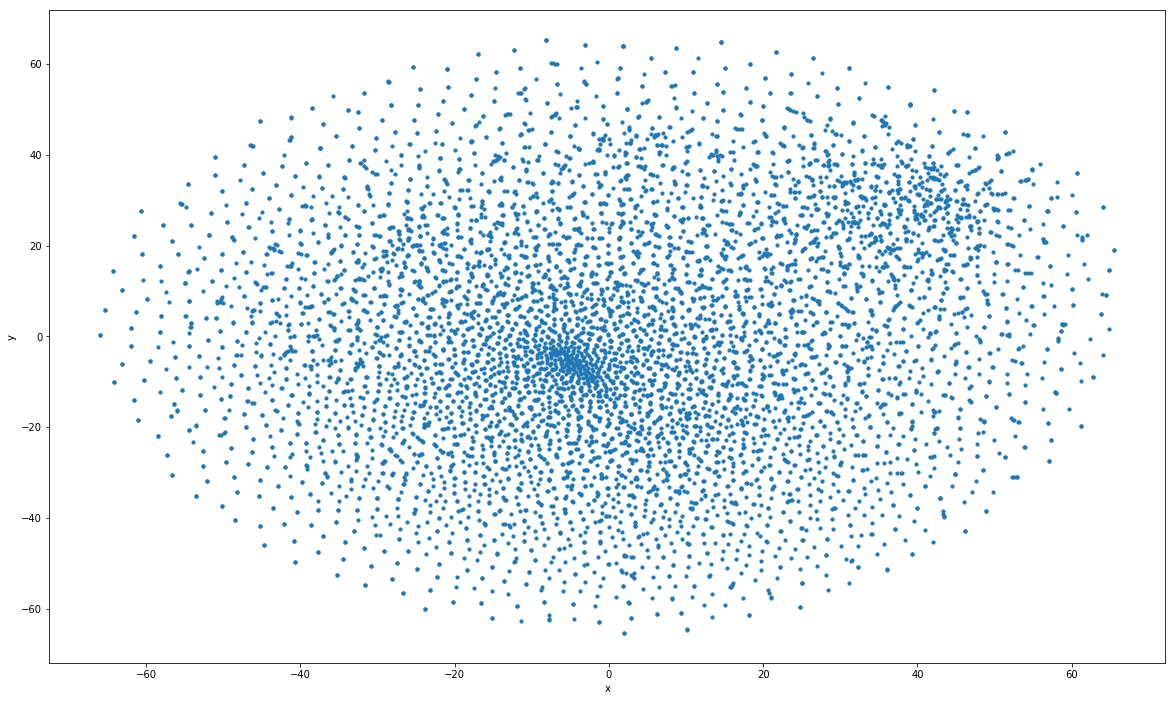

In [28]:
ax=points.plot.scatter("x", "y", s=10, figsize=(20, 12))

In [29]:
#distance,similarity and ranking
def plot_region(x_bounds, y_bounds):
    slice = points[
        (x_bounds[0] <= points.x) &
        (points.x <= x_bounds[1]) & 
        (y_bounds[0] <= points.y) &
        (points.y <= y_bounds[1])
    ]
    
    ax = slice.plot.scatter("x", "y", s=35, figsize=(10, 8))
    for i, point in slice.iterrows():
        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=11)

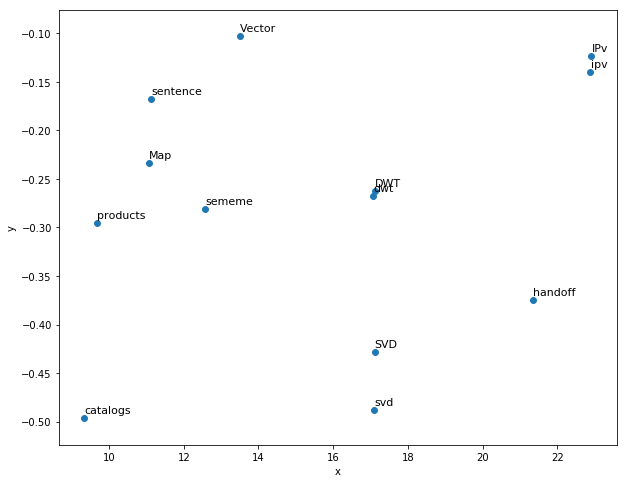

In [30]:
plot_region(x_bounds=(4, 30), y_bounds=(-0.5, -0.1))

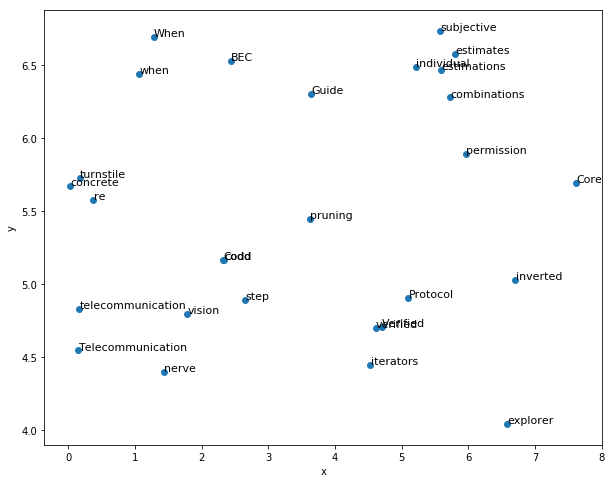

In [31]:
plot_region(x_bounds=(0, 8), y_bounds=(4, 7))

In [32]:

thrones2vec.most_similar("knowledge")

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
2018-11-25 16:39:00,562 : INFO : precomputing L2-norms of word weight vectors
C:\ProgramData\Anaconda\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(u'Knowledge', 0.5329232215881348),
 (u'tacit', 0.3383835554122925),
 (u'replaying', 0.3363734483718872),
 (u'shark', 0.3218047618865967),
 (u'SHARK', 0.3209803104400635),
 (u'reusing', 0.30770498514175415),
 (u'consolidating', 0.30169686675071716),
 (u'citizens', 0.29809534549713135),
 (u'repertory', 0.29773563146591187),
 (u'adversarial', 0.287693053483963)]

In [33]:
thrones2vec.most_similar("analysis")

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[(u'Analysis', 0.41256919503211975),
 (u'variables', 0.29008999466896057),
 (u'WODA', 0.28598514199256897),
 (u'poly', 0.282448410987854),
 (u'deployed', 0.27938976883888245),
 (u'sheet', 0.2778167724609375),
 (u'GNSS', 0.274691104888916),
 (u'loans', 0.2706194519996643),
 (u'static', 0.2704123258590698),
 (u'peeling', 0.269723117351532)]

In [34]:
thrones2vec.most_similar("information")

C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[(u'Information', 0.48244211077690125),
 (u'geographic', 0.35780206322669983),
 (u'retrieval', 0.3220716714859009),
 (u'partners', 0.3067980706691742),
 (u'neuroscience', 0.3003460168838501),
 (u'appraisal', 0.30024123191833496),
 (u'prototype', 0.2994725704193115),
 (u'drainage', 0.2968660593032837),
 (u'topss', 0.2866978645324707),
 (u'irrigation', 0.2786388397216797)]

In [35]:
def nearest_similarity_cosmul(start1, end1, end2):
    similarities = thrones2vec.most_similar_cosmul(
        positive=[end2, start1],
        negative=[end1]
    )
    start2 = similarities[0][0]
    print("{start1} is related to {end1}, as {start2} is related to {end2}".format(**locals()))
    return start2

In [36]:
nearest_similarity_cosmul("Curriculum", "Algorithms", "System")
nearest_similarity_cosmul("new", "Concurrent", "Framework")
nearest_similarity_cosmul("large", "software", "company")

Curriculum is related to Algorithms, as brief is related to System
new is related to Concurrent, as framework is related to Framework
large is related to software, as bases is related to company


C:\ProgramData\Anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  after removing the cwd from sys.path.


u'bases'

In [37]:
points.tail(1000)

,word,x,y
6467,charts,-37.878586,-14.292643
6468,titanium,43.812244,27.141251
6469,Identification,23.250086,-18.686316
6470,determine,34.113739,-37.619190
6471,there,1.596713,8.572843
6472,PL,52.212994,-30.988985
6473,dispersion,19.141689,37.600143
6474,actuator,17.357340,32.815411
6475,fish,-10.012071,33.776833
6476,Pipeline,4.741717,20.466351
